# Forecasting sales of agriculture products <h3>(Supply & Demand Analysis)</h3>

### **Exploratory Data Analysis and Data Prepration :**
During the comprehensive explorartory data analysis, we made the following observations:


In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load sales and indices combined data
combined_sales_ind = pd.read_csv(r"data\combined_sales_ind.csv",parse_dates=['Time'], index_col='Time')

# displaying data
display(combined_sales_ind)

#Size of data - Sales and 25 Indices
print(combined_sales_ind.shape)

,Sales,livestock1,livestock2,livestock3,livestock4,livestock5,livestock6,corn1,corn2,corn3,...,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,...,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,...,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,...,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,...,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,...,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,0.80,116.55,116.91,151.20,48.12,47.38,323.04,307.93,3.21,...,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8
2016-09-30,200,0.78,106.08,106.22,138.38,43.36,42.83,328.90,320.25,3.22,...,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5
2016-10-31,611,0.71,100.37,101.76,121.82,37.07,30.84,349.49,326.23,3.29,...,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8


(324, 36)


### Load data description file:

In [3]:
# load dictionary file
Indices_description = pd.ExcelFile(r"data\Dictionary.xlsx")
Indices_dsc = pd.read_excel(r"data\Dictionary.xlsx")
# Looking at the sheets avaialble in excel file
print(Indices_description.sheet_names) 

['Dictionary']


In [4]:
Indices_dsc.head()

,Indices_Name,Description,Indices_type
0,livestock1,"Broilers, Composite Average, Spot Price - Unit...",Commodity Prices
1,livestock2,"Live FOB Basis, Beef Breeds, Steers, 65% to 80...",Commodity Prices
2,livestock3,"Cattle Prices, Steers, Choice, 11-13 Centum We...",Commodity Prices
3,livestock4,"Feeder Cattle, Steers, Medium No. 1, 600-650 ...",Commodity Prices
4,livestock5,"Hog Prices, Barrows and Gilts, 6 Markets ($/CWT)",Commodity Prices


In [5]:
# Creating a dictionary of sheets in workbook
Indices_dict = {sheet: Indices_description.parse(sheet) for sheet in Indices_description.sheet_names}

In [6]:
# Extracting the Dictionary sheet from the workbook
Indices_desc = Indices_dict['Dictionary']
print(type(Indices_desc))
print(Indices_desc.shape)
display(Indices_desc)

<class 'pandas.core.frame.DataFrame'>
(35, 3)


,Indices_Name,Description,Indices_type
0,livestock1,"Broilers, Composite Average, Spot Price - Unit...",Commodity Prices
1,livestock2,"Live FOB Basis, Beef Breeds, Steers, 65% to 80...",Commodity Prices
2,livestock3,"Cattle Prices, Steers, Choice, 11-13 Centum We...",Commodity Prices
3,livestock4,"Feeder Cattle, Steers, Medium No. 1, 600-650 ...",Commodity Prices
4,livestock5,"Hog Prices, Barrows and Gilts, 6 Markets ($/CWT)",Commodity Prices
5,livestock6,"Hog Prices, Sows, No. 1-3 - Iowa/South Minneso...",Commodity Prices
6,corn1,"Corn Futures, 1st Expiration Nearby, Settlemen...",Commodity Prices
7,corn2,North Central and South Central Illinois Corn ...,Commodity Prices
8,corn3,"Producer Prices Received, Field Crops, Corn ($...",Commodity Prices
9,corn4,"Corn, No. 2 Yellow, Gulf Ports, US ($/bu)",Commodity Prices


**Notes from the Indices description:**

1. Indices are classified into two types: commodity prices(25) and economic indices (10)
2. Because the labels of some commodity price indices are either generic or too particular, they can be modified for better analysis.

In [7]:
# Creating a dictionary for new column names
new_column_names = {"livestock1" : "livestock1_broilers","livestock2" : "livestock2_beef_steers",
                   "livestock3" : "livestock3_steers","livestock4" : "livestock4_steers","livestock5" : "livestock5_hog",
                   "livestock6" : "livestock6_hog","BRLCSPOT.D7" : "BRLCS_broilers","STRTXOK.D7" : "STRTXOK_beef_steers" }

# Rename Columns
clean_combined_sales_ind = combined_sales_ind.rename(columns = new_column_names)
display(clean_combined_sales_ind.head())

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,...,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,...,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,...,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,...,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,...,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,...,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3


In [8]:
#Checking datatypes of columns
clean_combined_sales_ind.dtypes

Sales                       int64
livestock1_broilers       float64
livestock2_beef_steers    float64
livestock3_steers         float64
livestock4_steers         float64
livestock5_hog            float64
livestock6_hog            float64
corn1                     float64
corn2                     float64
corn3                     float64
corn4                     float64
wheat1                    float64
wheat2                    float64
wheat3                    float64
wheat4                    float64
wheat5                    float64
hay1                      float64
hay2                      float64
dairy1                    float64
dairy2                    float64
dairy3                    float64
dairy4                    float64
dairy5                    float64
dairy6                    float64
BRLCS_broilers            float64
STRTXOK_beef_steers       float64
FarmIncome                float64
Non-ResidentialInvest     float64
HOUST                     float64
RealGDP       

In [9]:
#Checking summary statistics
clean_combined_sales_ind.describe()

#Observation : based on count of values in each column, we can clealy see there are missing values in many columns

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,...,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
count,324.000000,310.000000,321.000000,224.000000,224.000000,224.000000,225.000000,324.000000,324.000000,324.000000,...,324.000000,216.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,439.416667,0.700097,88.387321,96.881786,126.124330,49.478438,39.450267,333.574846,321.146605,3.154938,...,65.728519,1804.805556,1306.916667,12960.656481,6.049383,6.022191,1.872284,6.392346,6.133117,90.493395
std,221.052834,0.154801,25.070336,27.535873,43.602165,12.668950,15.210220,146.908376,149.931396,1.395110,...,21.973514,234.066304,423.626562,2415.163914,1.546703,2.313083,0.343634,1.785735,0.871779,26.365347
min,102.000000,0.450000,58.080000,58.280000,70.370000,16.620000,7.800000,178.290000,148.830000,1.520000,...,39.660000,1459.000000,478.000000,8865.600000,3.800000,3.250000,1.280000,3.350000,4.570000,25.300000
25%,263.000000,0.570000,69.330000,77.435000,95.867500,40.535000,28.320000,226.122500,215.297500,2.140000,...,47.720000,1609.825000,1004.000000,10711.025000,4.900000,3.250000,1.580000,4.887500,5.497500,68.272500
50%,397.000000,0.655000,80.460000,89.065000,114.275000,48.420000,38.440000,268.420000,262.095000,2.555000,...,58.950000,1740.850000,1340.000000,13262.250000,5.600000,6.000000,1.840000,6.390000,6.120000,93.080000
75%,571.000000,0.810000,98.110000,119.402500,145.387500,57.680000,47.380000,382.970000,365.237500,3.672500,...,79.260000,1989.350000,1604.250000,14903.325000,6.900000,8.250000,2.172500,7.680000,6.780000,106.550000
max,1498.000000,1.150000,167.500000,170.040000,262.340000,95.170000,93.440000,803.540000,815.900000,7.630000,...,123.730000,2217.500000,2273.000000,16813.300000,10.000000,10.110000,2.430000,10.480000,7.730000,144.700000


**Exploration of Indices and Missing Values**

<AxesSubplot:>

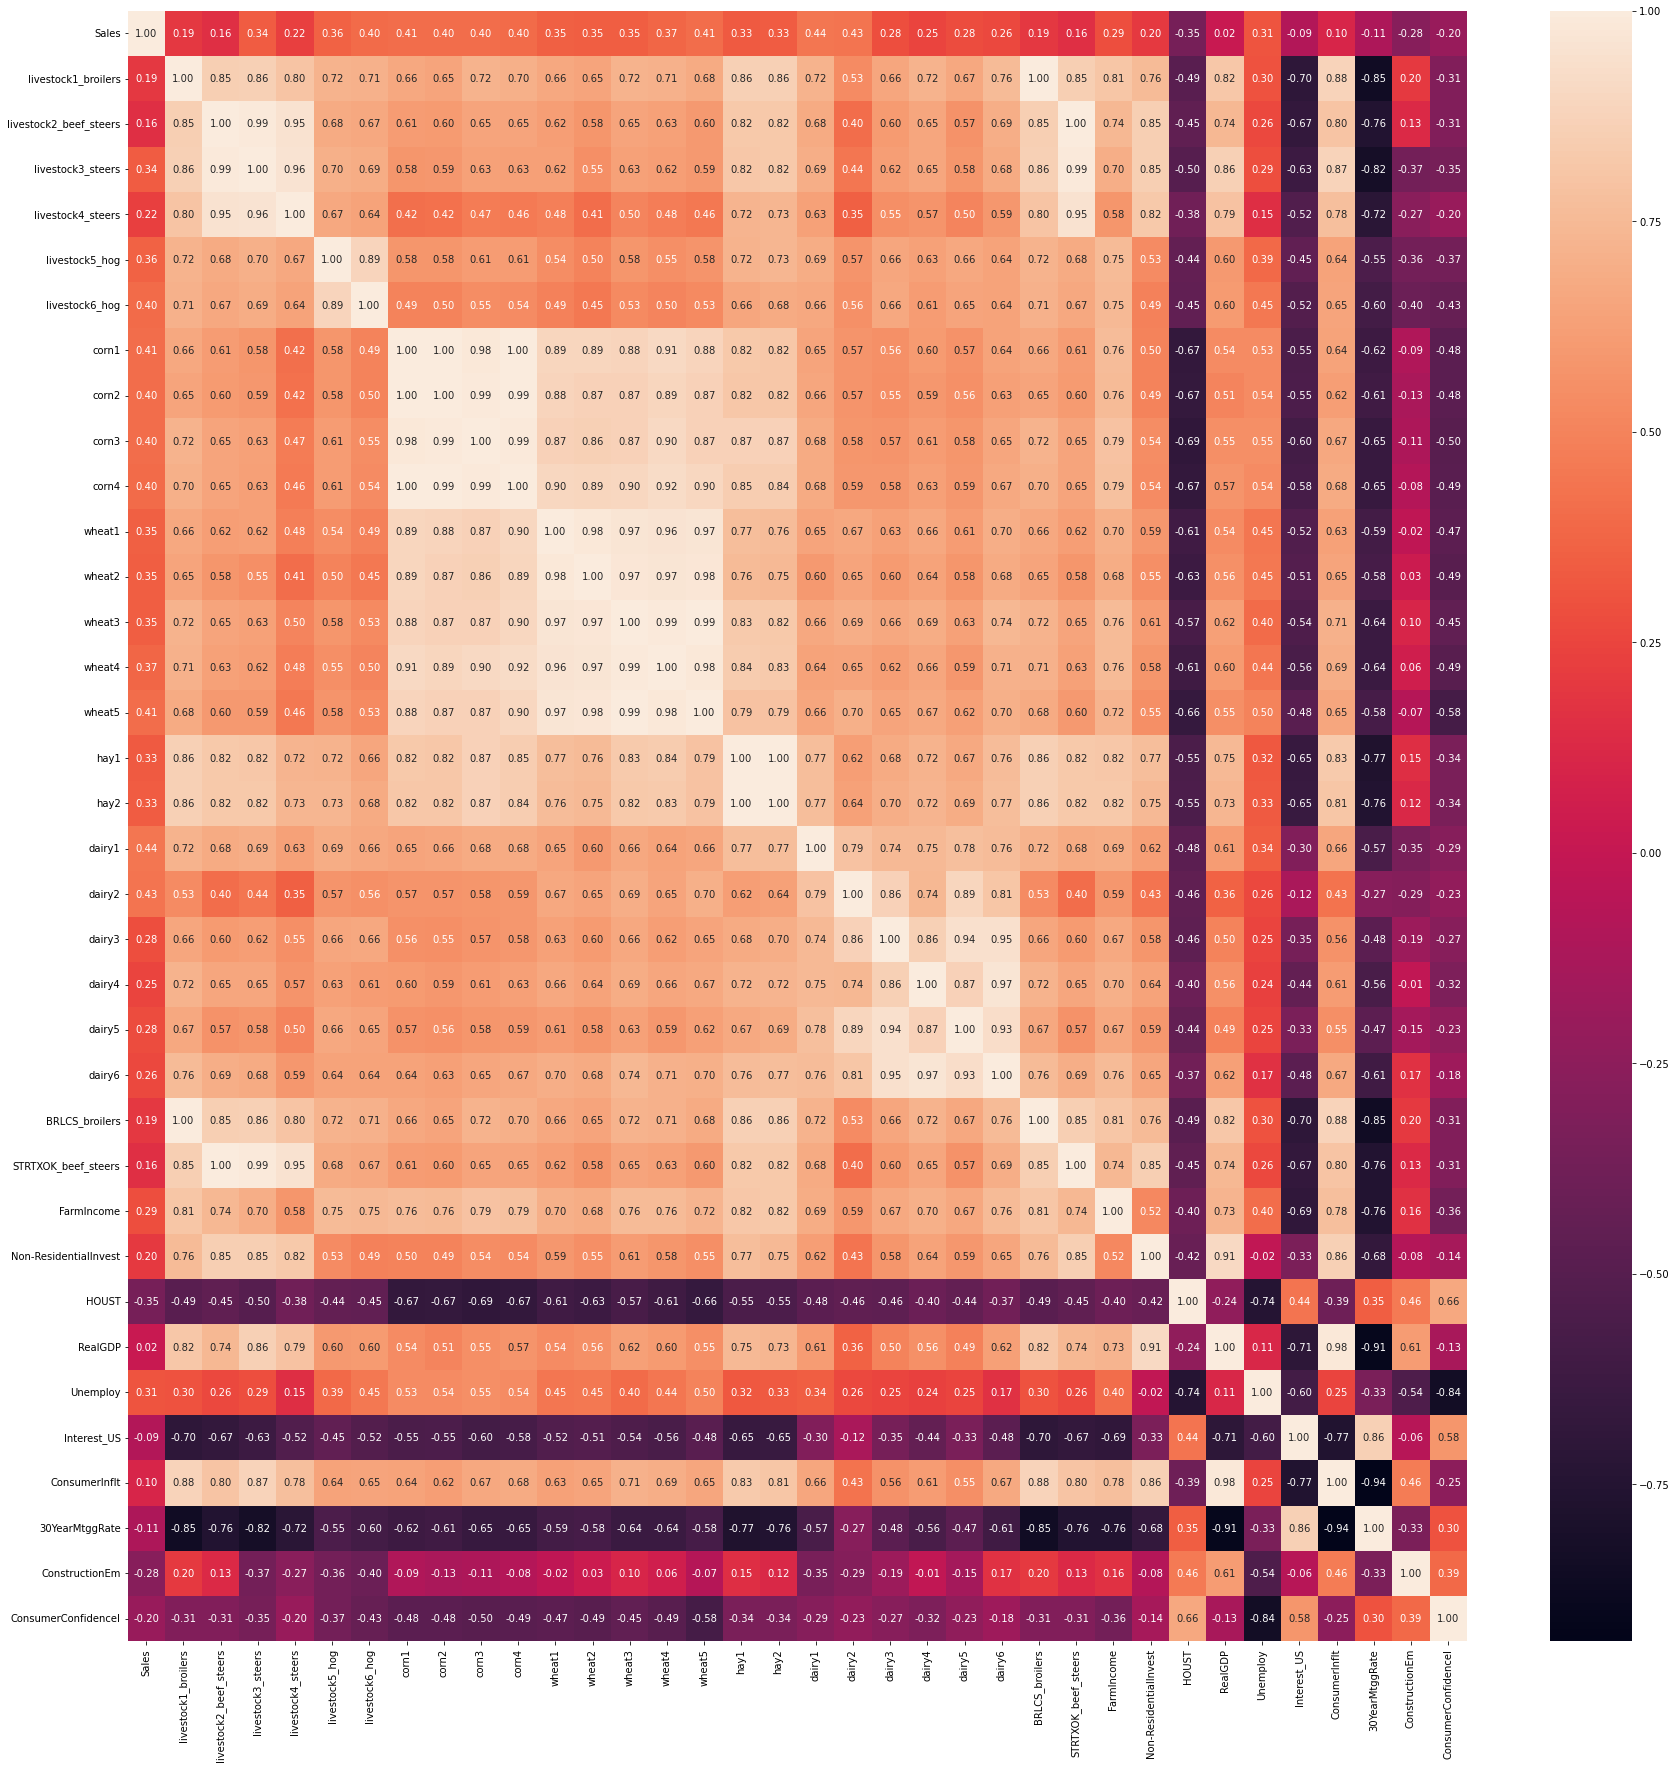

In [10]:
# Plotting correlation heat map
fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(clean_combined_sales_ind.corr(),annot=True,fmt =".2f")

**Observations from the correlation map:**
* Some variables exhibit perfect correlation. They might be duplicates or represent the same information.

In [11]:
# Columns with perfect correlation 
clean_combined_sales_ind.columns[(clean_combined_sales_ind.corr()==1).sum()>1]

Index(['livestock1_broilers', 'livestock2_beef_steers', 'BRLCS_broilers',
       'STRTXOK_beef_steers'],
      dtype='object')

In [12]:
# # Importing data table
# %load_ext google.colab.data_table
# from google.colab import data_table

In [13]:
#Creating a copy of clean_combined_sales_ind
clean_combined_sales_ind_copy = clean_combined_sales_ind.copy()

# Checking rows with missing values
clean_combined_sales_ind_copy["sum"] = clean_combined_sales_ind_copy.isnull().sum(axis=1)

# Columns with atleast one missing value
miss_val_columns = clean_combined_sales_ind_copy.loc[:,clean_combined_sales_ind_copy.isnull().any()].columns
print(miss_val_columns)
type(miss_val_columns)

Index(['livestock1_broilers', 'livestock2_beef_steers', 'livestock3_steers',
       'livestock4_steers', 'livestock5_hog', 'livestock6_hog', 'wheat5',
       'dairy1', 'dairy2', 'dairy3', 'dairy4', 'dairy5', 'BRLCS_broilers',
       'STRTXOK_beef_steers', 'Non-ResidentialInvest'],
      dtype='object')


pandas.core.indexes.base.Index

In [14]:
# Explore table with columns having missing values
miss_val_col_data = clean_combined_sales_ind_copy[list(miss_val_columns)][clean_combined_sales_ind_copy["sum"]>0]

# Explore data table with columns having missing values
# data_table.DataTable(miss_val_col_data , include_index= True, num_rows_per_page=10)

<AxesSubplot:>

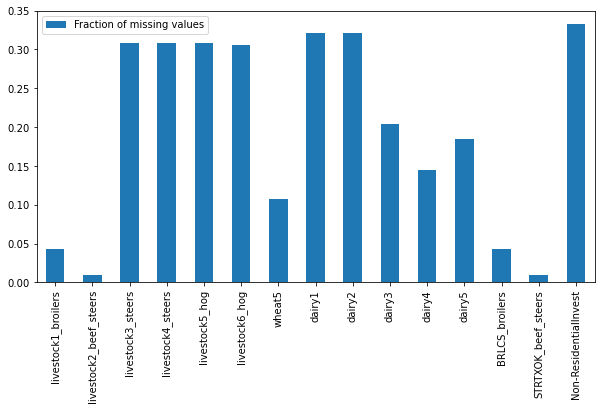

In [15]:
#Fraction of missing values in columns with missing values
fract_miss_col = pd.DataFrame(clean_combined_sales_ind_copy[list(miss_val_columns)].isnull().mean())
fract_miss_col.columns = ["Fraction of missing values"]

#Ploting fraction of missing values
fract_miss_col.plot.bar(figsize= (10,5))

**Observation from Fraction of missing values:**

In variables with more than 20% missing values, imputation may not be the optimum method. We may need to think about deleting variables or a portion of the time series. This conclusion can be made following further examination of each variable.

In [16]:
# Marking Rows with Missing values with _isNA column labels
IsNA_col_labels= []
for column in list(miss_val_columns):
  clean_combined_sales_ind[[column+"_isNA"]]= clean_combined_sales_ind[[column]].isnull()*1
  x=column+"_isNA"
  IsNA_col_labels.append(x)

display(clean_combined_sales_ind)
print(IsNA_col_labels)

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,...,livestock6_hog_isNA,wheat5_isNA,dairy1_isNA,dairy2_isNA,dairy3_isNA,dairy4_isNA,dairy5_isNA,BRLCS_broilers_isNA,STRTXOK_beef_steers_isNA,Non-ResidentialInvest_isNA
Time,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,...,1,1,1,1,1,1,1,1,0,1
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,...,1,1,1,1,1,1,1,1,0,1
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,...,1,1,1,1,1,1,1,1,0,1
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,...,1,1,1,1,1,1,1,1,0,1
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,...,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,0.80,116.55,116.91,151.20,48.12,47.38,323.04,307.93,3.21,...,0,0,0,0,0,0,0,0,0,0
2016-09-30,200,0.78,106.08,106.22,138.38,43.36,42.83,328.90,320.25,3.22,...,0,0,0,0,0,0,0,0,0,0
2016-10-31,611,0.71,100.37,101.76,121.82,37.07,30.84,349.49,326.23,3.29,...,0,0,0,0,0,0,0,0,0,0


['livestock1_broilers_isNA', 'livestock2_beef_steers_isNA', 'livestock3_steers_isNA', 'livestock4_steers_isNA', 'livestock5_hog_isNA', 'livestock6_hog_isNA', 'wheat5_isNA', 'dairy1_isNA', 'dairy2_isNA', 'dairy3_isNA', 'dairy4_isNA', 'dairy5_isNA', 'BRLCS_broilers_isNA', 'STRTXOK_beef_steers_isNA', 'Non-ResidentialInvest_isNA']


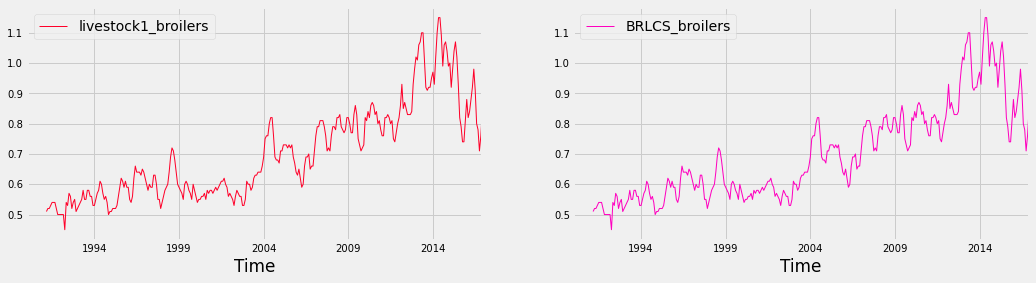

In [17]:
# Ploting livestock1_broilers and BRLCS_broilers
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock1_broilers","BRLCS_broilers"]].plot(subplots=True,linewidth=1,layout =(1,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(16,4),fontsize=10)
plt.show()

Observation: livestock1_broilers and BRLCS_broilers are duplicates, therefore one of these variables can be dropped. We will remove livestock1_broilers 